# Time-series analysis of the Normalised Difference Water Index(NDWI) from Sentinel-2 during 2021 drought in Uttarakhand’s Terai region

This python code is to access Sentinel-2 time series data of Uttarakhand region from Google Earth Engine via the Python API and visualise the results.

# Workflow of the project
* Define an area of interest in uttarakhand based on an ESRI shapefile
* Define a time window 
* Set a maximum acceptable cloud cover for the search
* Use Google Earth Engine to download a time-series of average NDWI values averaged over Uttarakhand
* Visualise the time series as a movie


Connecting Google Drive with Colab

In [ ]:
# Importing Google drive
from google.colab import drive
drive.mount('/content/drive')   # Mount your Google Drive as a drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Installing required libraries and importing other required python libraries

In [ ]:
# Installing required libraries


!pip install rasterio         # Access to geospatial raster data
!pip install geopandas        # Extends the datatypes used by pandas to allow spatial operations on geometric types
!pip install rasterstats      # For summarizing geospatial raster datasets based on vector geometries 
!pip install earthengine-api  # GEE is the cloud based advanced geospatial processing platform allows users to process various remotely-sensed images as well as vector datasets
!pip install requests         # It sends a request to the server, and after the request processes the server returns a response to the client
!pip install sentinelsat      # Sentinelsat makes searching, downloading and retrieving the metadata of Sentinel satellite images from the Copernicus Open Access Hub


# Importing required libraries

import json                       # It is a standard text-based format for representing structured data based on JavaScript object syntax, used for transmitting data in web applications
import geopandas as gpd           # For spatial operations
import matplotlib.pyplot as plt   # For creating static, animated, and interactive visualizations 
import math                       # To use mathematical functions
import numpy as np                # For working with arrays & in domain of linear algebra, fourier transform, and matrices
from osgeo import gdal, ogr       # Function of osgeo is to Import/Export of data ,Linking to external data sources ,Reprojection tools ,GIS analysis ,Plotting and printing
import os                         # functions for interacting with the operating system
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd                # Data structures designed to make working with “relational” or “labeled” data 
from pprint import pprint          # “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter
import rasterio
from rasterio import plot
from rasterio.plot import show_hist
from scipy import optimize         # Scientific functions for optimization, stats and signal processing
import shutil                      # Functions for optimization, stats and signal processing
import sys                         # To manipulate different parts of the Python runtime environment
import zipfile                     # To create, read, write, append, and list a ZIP file
import requests                    
import io                          # allows us to manage the file-related input and output operations
import webbrowser                  # provides a high-level interface that allows displaying Web-based documents to users
import ee                          # Python API package 


libdir = '/content/drive/MyDrive/219044739_GY7709_CW_1'  # Locate the path of the 'pygge.py' library file in the drive
if libdir not in sys.path:
    sys.path.append(libdir)         
                                 
import pygge                            # for satellite image analysis in python developed by Dr.Heiko Balzter
%matplotlib inline                      

ModuleNotFoundError: ignored

# Authenticate to the Google Earth Engine API.

API stands for 'application programming interface'. An API defines interactions between multiple software intermediaries, in this case between our Jupyter Notebook and the ESA Copernicus Data Hub. It defines the kinds of calls or requests that can be made, how to make them, the data formats that should be used, the conventions to follow etc. (text modified after Wikipedia)

# Connecting to Google Earth Engine API

In [ ]:
# Connect to Google Earth Engine API

!earthengine authenticate

ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=BYiPJNIKzJ4GtZcEHzFXXvkEYgcrikQFMLHhQrEmqh4&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWiln01P3H2Ug9hOP70y7YPxW20osjAu8lCPrzOve4OmdQNwgodeVaM

Successfully saved authorization token.


# Connecting the data directory and work directory for the project in the Google Drive




In [ ]:
#path to your permanent Google Drive 
# (not so much space but will be kept after the session)
# EDIT THIS LINE (/content/drive/MyDrive is the top directory on Google Drive):
wd = "/content/drive/MyDrive/219044739_GY7709_CW_1/"
print("Connected to data directory: " + wd)

# path to your temporary drive on the Colab Virtual Machine 
# (more disk space but will be deleted when Colab is closed)
cd = "/content/work"

# directory for downloading data
downloaddir = join(cd, 'download') # where we save the downloaded images

# CAREFUL: This code removes the named directories and everything inside them to free up space
# Note: shutil provides a lot of useful functions for file and directory management
try:
  shutil.rmtree(downloaddir)
except:
  print(downloaddir + " not found.")

# create the new directories, unless they already exist
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddir, exist_ok=True)

print("Connected to Colab temporary data directory: " + cd)

print("\nList of contents of " + wd)
for f in sorted(os.listdir(wd)):
  print(f)

Connected to data directory: /content/drive/MyDrive/219044739_GY7709_CW_1/
Connected to Colab temporary data directory: /content/work

List of contents of /content/drive/MyDrive/219044739_GY7709_CW_1/
219044739_GY7709_CW1.ipynb
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.zip
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.zip
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.zip
__pycache__
pygge.py
s2.tif
s2_month001.tif
s2_month002.tif
s2_month003.tif
s2_month004.tif
s2_month005.tif
s2_month006.tif
sencredentials.txt
uttarakhand_drought_movie.gif
uttarakhand_ndwi_movie.gif
uttarakhand_shapefile


#Uploading uttarakhand shapefile and data timeline for imagery search from GEE

The shapefile can be downloaded from www.geojson.io for the area to be analysed.

In [ ]:
# THE shapefile POINTS TO THE CORRECT FILE
shapefile = join(wd, 'uttarakhand_shapefile', 'POLYGON.shp') # ESRI Shapefile of the study area

# Define a date range for our search
datefrom = '2021-07-01' # start date for imagery search (JULY 2021)
dateto   = '2021-12-31' # end date for imagery search (DECEMBER 2021)
time_range = [datefrom, dateto] # format as a list

# Define maximum acceptable cloud cover in %
clouds = 10 

#Getting shapefile details such as CRS ,Extent and EPSG Code

In [ ]:
# Get the shapefile layer's extent, CRS and EPSG code
extent, outSpatialRef, epsg = pygge.get_shp_extent(shapefile)
print("Extent of the area of interest (shapefile):\n", extent)
print(type(extent))
print("\nCoordinate referencing system (CRS) of the shapefile:\n", outSpatialRef)
print('EPSG code: ', epsg)

Extent of the area of interest (shapefile):
 (78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686)
<class 'tuple'>

Coordinate referencing system (CRS) of the shapefile:
 GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295],
    AUTHORITY["EPSG","4326"]]
EPSG code:  4326


# GEE needs a special format for defining an area. 

It has to be a GeoJSON Polygon and the coordinates should be first defined in a list and then converted using ee.Geometry. 



In [ ]:
extent_list = list(extent)
print(extent_list)
print(type(extent_list))
# close the list of polygon coordinates by adding the starting node at the end again
# and make list elements in the form of coordinate pairs (y,x)
area_list = list([(extent[0], extent[2]),(extent[1], extent[2]),(extent[1], extent[3]),(extent[0], extent[3]),(extent[0], extent[2])])
print(area_list)
print(type(area_list))

search_area = ee.Geometry.Polygon(area_list)
print(search_area)
print(type(search_area))

[78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686]
<class 'list'>
[(78.34762573242188, 30.440386086566367), (78.44238281249999, 30.440386086566367), (78.44238281249999, 30.507850271871686), (78.34762573242188, 30.507850271871686), (78.34762573242188, 30.440386086566367)]
<class 'list'>
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              78.34762573242188,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.440386086566367
            ]
          ]
        ]
      },
  

# Obtain download links for image composites from an image collection on Google Earth Engine. 
Download images in Geotiff, using the get_url(name, image, scale, region) method. The ‘region’ is obtained from the area, but the format has to be adjusted using get_region(geom) method. To save disk space, we may want to download only certain bands, a list of strings only download R,G,B and NIR bands

In [ ]:
# Obtain download links for image composites from an image collection on Google Earth Engine
# All products available are detailed on this page https://developers.google.com/earth-engine/datasets/.

# Name of the Sentinel 2 image collection
s2collection = ('COPERNICUS/S2')

# get the median composite of Sentinel-2 images in the time range
s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)

# to save disk space, we may want to download only certain bands
# band names for download, a list of strings
# only download R,G,B and NIR bands
bands = ['B2', 'B3', 'B4', 'B8']
print(bands)

# spatial resolution of the downloaded data
resolution = 20 # in units of metres


search_region = pygge.get_region(search_area)
s2url = pygge.get_url('s2', s2median.select(bands), resolution, search_region, filePerBand=False)
print(s2url)

['B2', 'B3', 'B4', 'B8']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/de5876c5f8e3944aca21736bf15f60a6-8748bf09ec89d2a3d8cfb26e93fc22b4:getPixels


In [ ]:
# change directory to download directory
os.chdir(downloaddir)

# request information on the file to be downloaded
f = pygge.requests.get(s2url, stream =True)

# check whether it is a zip file
check = zipfile.is_zipfile(io.BytesIO(f.content))

# either download the file as is, or unzip it
while not check:
    f = requests.get(s2url, stream =True)
    check = zipfile.is_zipfile(io.BytesIO(f.content))
else:
    z = zipfile.ZipFile(io.BytesIO(f.content))
    z.extractall()

In [ ]:
# where we stored the downloaded Sentinel-2 images
os.chdir(downloaddir)
print("contents of ", downloaddir, ":")
!ls -l

contents of  /content/work/download :
total 1704
-rw-r--r-- 1 root root 1743872 Apr  4 06:56 s2.tif


In [ ]:
# get list of all tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
print(allfiles)

# select the file for visualisation
thisfile = allfiles[0]
print(thisfile)

['s2.tif']
s2.tif


#Plotting the study area in Full Extent

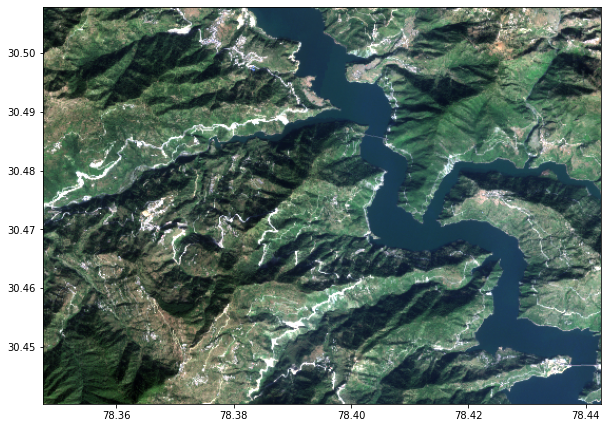

In [ ]:
# create a figure with 2x3 subplots
fig, (ax1) = plt.subplots(1,1, figsize=(10,16))
fig.patch.set_facecolor('white')

# the downloaded file is float32 data format
# for plotting, we need uint8 data format

# plot the image with full extent
pygge.easy_plot(thisfile, ax=ax1, bands=[3,2,1], percentiles=[0,99])



# The EPSG code of the  shapefile into which we want to reproject the TCI images

In [ ]:
# print the EPSG code of our shapefile into which we want to reproject the TCI images
print("Reprojecting image to EPSG projection ", epsg)

# make a file name for our new file
warpfile = thisfile.split(sep='.')[0] + '_warped.tif'
print("We are in this directory: ")
!pwd
print("Input file: ", thisfile)
print("Output file: ", warpfile)

# call the easy_warp function
tmp = pygge.easy_warp(thisfile, warpfile, epsg)

Reprojecting image to EPSG projection  4326
We are in this directory: 
/content/work/download
Input file:  s2.tif
Output file:  s2_warped.tif
Creating warped file:s2_warped.tif


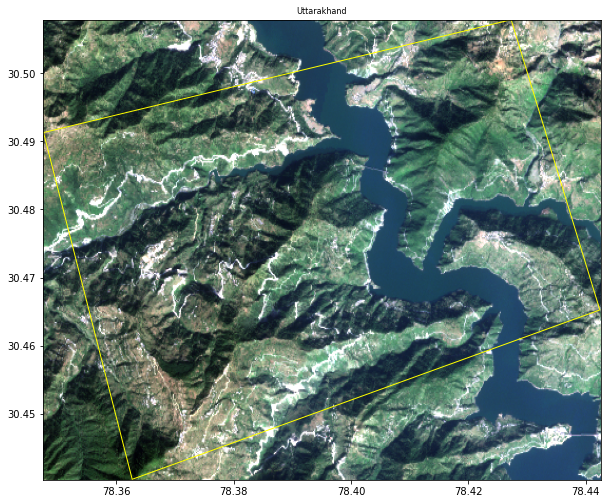

In [ ]:
# create a figure with subplots
fig, ax1 = plt.subplots(1,1, figsize=(10,16))
fig.patch.set_facecolor('white')

# plot the image with full extent
pygge.easy_plot(warpfile, ax=ax1, percentiles=[0,98], bands=[3,2,1],
                shapefile=shapefile, fillcolor="none", linecolor="yellow", 
                title="Uttarakhand")



In [ ]:
# Obtain monthly image composites

# change directory to download directory
os.chdir(downloaddir)

# make a list of lists with all date ranges for our new searches
months = [
          ['2021-07-01', '2021-07-31'],
          ['2021-08-01', '2021-08-31'],
          ['2021-09-01', '2021-09-30'],
          ['2021-10-01', '2021-10-31'],
          ['2021-11-01', '2021-11-30'],
          ['2021-12-01', '2021-12-31']]

# set cloud cover threshold
clouds = 30

# band names for download, a list of strings
# only download R,G,B bands
bands = ['B4', 'B3', 'B2']

# spatial resolution of the downloaded data
resolution = 20 # in units of metres

# iterate over the months
for month in range(len(months)):
  time_range = months[month]
  print(time_range)

  # do the search on Google Earth Engine
  s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)

  # print out the band names of the image composite that was returned by our search
  band_names = s2median.bandNames().getInfo()

  # check whether the search returned any imagery
  if len(band_names) == 0:
    print("Search returned no results.")

  else:
    # print all band names  
    print(band_names)

    # begin the file name with this ID
    file_id = 's2_month'
    
    s2url = pygge.get_url(file_id+str(month+1).zfill(3), s2median.select(bands), resolution, search_region, filePerBand=False)
    print(s2url)

    # request information on the file to be downloaded
    f = pygge.requests.get(s2url, stream =True)

    # check whether it is a zip file
    check = zipfile.is_zipfile(io.BytesIO(f.content))

    # either download the file as is, or unzip it
    while not check:
        f = pygge.requests.get(s2url, stream =True)
        check = zipfile.is_zipfile(io.BytesIO(f.content))
    else:
        z = zipfile.ZipFile(io.BytesIO(f.content))
        z.extractall()

# after downloading all image composites, get a list of all files we want to warp

allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
files_for_warp = [s for s in allfiles if file_id in s]

print("Files with file ID ", file_id, " for warping:")
pprint(sorted(files_for_warp))


['2021-07-01', '2021-07-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/d08c5febc2a4337821abc6a67af641aa-c9191971ffa932f4e71d61b7b1c97560:getPixels
['2021-08-01', '2021-08-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/9569d500a57a59b3b23555c65a5a35f0-91894c392077eb9bc5f2d0ff22e5bbd7:getPixels
['2021-09-01', '2021-09-30']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/2d38299d5b9a7876401184841ef5bca2-93a08cc7c72998ad7aec58be30914351:getPixels
['2021-10-01', '2021-10-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10'

Warping raster file s2_month001.tif
Creating warped file:s2_month001_warped.tif
Converting raster file s2_month001_warped.tif to 8-bit unsigned integer data type.
Warping raster file s2_month002.tif
Creating warped file:s2_month002_warped.tif
Converting raster file s2_month002_warped.tif to 8-bit unsigned integer data type.
Warping raster file s2_month003.tif
Creating warped file:s2_month003_warped.tif
Converting raster file s2_month003_warped.tif to 8-bit unsigned integer data type.
Warping raster file s2_month004.tif
Creating warped file:s2_month004_warped.tif
Converting raster file s2_month004_warped.tif to 8-bit unsigned integer data type.
Warping raster file s2_month005.tif
Creating warped file:s2_month005_warped.tif
Converting raster file s2_month005_warped.tif to 8-bit unsigned integer data type.
Warping raster file s2_month006.tif
Creating warped file:s2_month006_warped.tif
Converting raster file s2_month006_warped.tif to 8-bit unsigned integer data type.
Files after warping:
[

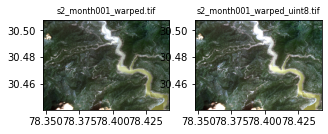

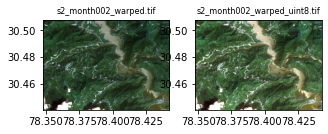

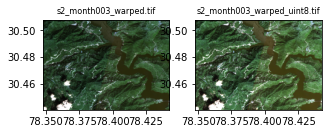

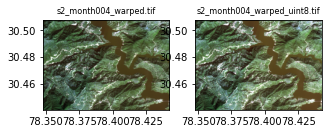

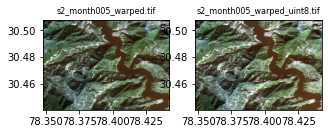

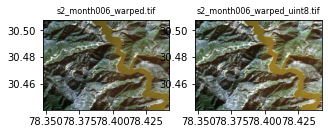

In [ ]:
# create and empty list for the newly created uint8 data file names
uint8files = []

# now warp them all
for f in sorted(files_for_warp):
  # make a file name for our new files
  warpfile = f.split('.')[0]+'_warped.tif'
  uint8file = f.split('.')[0]+'_warped_uint8.tif'
  # call the easy_warp function
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpfile, epsg)
  # convert to uint8 data type
  print("Converting raster file " + warpfile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(warpfile, uint8file, np.uint8, percentiles=[0,98])
  uint8files.append(uint8file)
  # create thumbnails for quality checking
  fig, ax = plt.subplots(1,2, figsize=(5,2.5))
  fig.patch.set_facecolor('white')
  pygge.easy_plot(warpfile, ax=ax[0], percentiles=[0,99], title=warpfile)
  pygge.easy_plot(uint8file, ax=ax[1], percentiles=[0,99], title=uint8file)
  
# after downloading and warping all image composites, get a list of all warped tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
warpfiles = [s for s in allfiles if "_warped.tif" in s]

print("Files after warping:")
pprint(sorted(warpfiles))

print("Files after conversion to uint8 data type:")
pprint(sorted(uint8files))

In [ ]:
import imageio

# create an empty Numpy array where we will merge all raster images
images = []

# iterate over all zoom files
for f in sorted(uint8files):
  images.append(imageio.imread(f)) # read the next image and append it

# set the frame rate in seconds
framerate = { 'duration': 2 }

# save the movie
imageio.mimsave(join(downloaddir, "uttarakhand_drought_movie.gif"), images, **framerate)

# To get the time series of Sentinel-2 image composites covering the period from July 2021 to the end of the drought in the Terai region. 



First step is to calculate the average reflectances of the selected bands for each Sentinel-2 image in the image collection.

In [ ]:
# Load the Drive helper and mount your Google Drive as a drive in the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install some libraries that are not on Colab by default
!pip install rasterio
!pip install geopandas
!pip install rasterstats
!pip install earthengine-api
!pip install requests
!pip install sentinelsat


# import libraries
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import numpy as np
from osgeo import gdal, ogr
import os
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
from pprint import pprint
import rasterio
from rasterio import plot
from rasterio.plot import show_hist
from scipy import optimize
import shutil
import sys
import zipfile
import requests
import io
import webbrowser
import ee

# make sure that this path points to the location of the pygge module on your Google Drive
libdir = '/content/drive/MyDrive/219044739_GY7709_CW_1' # this is where pygge.py needs to be saved
if libdir not in sys.path:
    sys.path.append(libdir)

# import the pygge module
import pygge

%matplotlib inline

In [ ]:
# Connecting to Google Earth Engine API

!earthengine authenticate

ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=5cslAE2PwRPeqozHt01i24GgKaAtEDKn5CzEcYo7dKA&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWguc8h89VBcoMWbYLJDp3lvcYu5MFMel9k3hFEUgd6MoeBu-XtBIus

Successfully saved authorization token.


# Getting the feature of study area as geojson polygon 

In [ ]:
# GEE needs a special format for defining an area of interest. 
# It has to be a GeoJSON Polygon and the coordinates should be first defined in a list and then converted using ee.Geometry. 
extent_list = list(extent)
print(extent_list)
print(type(extent_list))

# close the list of polygon coordinates by adding the starting node at the end again
# and make list elements in the form of coordinate pairs (y,x)
area_list = list([(extent[0], extent[2]),(extent[1], extent[2]),(extent[1], extent[3]),(extent[0], extent[3]),(extent[0], extent[2])])
print(area_list)
print(type(area_list))

search_area = ee.Geometry.Polygon(area_list)
print(search_area)
print(type(search_area))

[78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686]
<class 'list'>
[(78.34762573242188, 30.440386086566367), (78.44238281249999, 30.440386086566367), (78.44238281249999, 30.507850271871686), (78.34762573242188, 30.507850271871686), (78.34762573242188, 30.440386086566367)]
<class 'list'>
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              78.34762573242188,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.440386086566367
            ]
          ]
        ]
      },
  

In [ ]:
# path to the Google Drive

wd = "/content/drive/MyDrive/219044739_GY7709_CW_1"
print("Connected to data directory: " + wd)

# path to your temporary drive on the Colab Virtual Machine
cd = "/content/work"

# directory for downloading the Sentinel-2 composites

downloaddir = join(cd, 'download') # where we save the downloaded images

# Note: shutil provides a lot of useful functions for file and directory management
try:
  shutil.rmtree(downloaddir)
except:
  print(downloaddir + " not found.")

# create the new directories, unless they already exist
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddir, exist_ok=True)

print("Connected to Colab temporary data directory: " + cd)

print("\nList of contents of " + wd)
for f in sorted(os.listdir(wd)):
  print(f)

Connected to data directory: /content/drive/MyDrive/219044739_GY7709_CW_1
Connected to Colab temporary data directory: /content/work

List of contents of /content/drive/MyDrive/219044739_GY7709_CW_1
219044739_GY7709_CW1.ipynb
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.zip
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.zip
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.zip
__pycache__
pygge.py
s2.tif
s2_month001.tif
s2_month002.tif
s2_month003.tif
s2_month004.tif
s2_month005.tif
s2_month006.tif
sencredentials.txt
uttarakhand_drought_movie.gif
uttarakhand_ndwi_movie.gif
uttarakhand_shapefile


#Time Series of downloaded sentinel-2 Uttarakhand Images

In [ ]:
# EDIT THE SEARCH OPTIONS BELOW

# YOU CAN PLACE A DIFFERENT SHAPEFILE ONTO YOUR GOOGLE DRIVE BUT MAKE SURE THAT
# THE VARIABLE shapefile POINTS TO THE CORRECT FILE:
shapefile = join(wd, 'uttarakhand_shapefile', 'POLYGON.shp')    # ESRI Shapefile of the study area

# Define a date range for our search
datefrom = '2021-07-01'                               # start date for imagery search
dateto   = '2021-12-31'                               # end date for imagery search
time_range = [datefrom, dateto]                       # format as a list

# maximum acceptable cloud cover in %
clouds = 10

In [ ]:
# Get the shapefile layer's extent, CRS and EPSG code
extent, outSpatialRef, epsg = pygge.get_shp_extent(shapefile)
print("Extent of the area of interest (shapefile):\n", extent)
print(type(extent))
print("\nCoordinate referencing system (CRS) of the shapefile:\n", outSpatialRef)
print('EPSG code: ', epsg)

Extent of the area of interest (shapefile):
 (78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686)
<class 'tuple'>

Coordinate referencing system (CRS) of the shapefile:
 GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295],
    AUTHORITY["EPSG","4326"]]
EPSG code:  4326


In [ ]:
# GEE needs a special format for defining an area of interest. 
# It has to be a GeoJSON Polygon and the coordinates should be first defined in a list and then converted using ee.Geometry. 
extent_list = list(extent)
print(extent_list)
print(type(extent_list))
# close the list of polygon coordinates by adding the starting node at the end again
# and make list elements in the form of coordinate pairs (y,x)
area_list = list([(extent[0], extent[2]),(extent[1], extent[2]),(extent[1], extent[3]),(extent[0], extent[3]),(extent[0], extent[2])])
print(area_list)
print(type(area_list))

search_area = ee.Geometry.Polygon(area_list)
print(search_area)
print(type(search_area))

[78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686]
<class 'list'>
[(78.34762573242188, 30.440386086566367), (78.44238281249999, 30.440386086566367), (78.44238281249999, 30.507850271871686), (78.34762573242188, 30.507850271871686), (78.34762573242188, 30.440386086566367)]
<class 'list'>
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              78.34762573242188,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.440386086566367
            ],
            [
              78.44238281249999,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.507850271871686
            ],
            [
              78.34762573242188,
              30.440386086566367
            ]
          ]
        ]
      },
  

# From the Image Collection only B3 and B8 Bands are selected for NDWI Calculation

In [ ]:
# Obtain download links for image composites from an image collection on Google Earth Engine
# All products available are detailed on this page https://developers.google.com/earth-engine/datasets/.

# Name of the Sentinel 2 image collection
s2collection = ('COPERNICUS/S2')
print("Image collection: ", s2collection)

# select bands
bands = ['B2', 'B4']
print(bands)

# spatial resolution of the downloaded data
resolution = 320 # in units of metres
print("resolution: ", resolution)
# get the Sentinel-2 image collection within the time range
s2collect = pygge.obtain_image_collection_sentinel(s2collection, time_range, search_area, clouds).select(bands)

# ‘region’ is obtained from the area, but the format has to be adjusted using get_region(geom) method
search_region = pygge.get_region(search_area)

Image collection:  COPERNICUS/S2
['B2', 'B4']
resolution:  320


In [ ]:

# .getRegion outputs an array of values for each [pixel, band, image] tuple in an ImageCollection
# The output contains rows of id, lon, lat, time, and all bands for each image that 
# intersects each pixel in the given region.
# Note that the getRegion function is limited to about 1 million values.
s2aoi = s2collect.getRegion(search_area, resolution).getInfo()

# Preview the result
s2aoi[:4]

[['id', 'longitude', 'latitude', 'time', 'B2', 'B4'],
 ['20211003T051701_20211003T052600_T44RKU',
  78.34890312422277,
  30.440671043787752,
  None,
  None,
  None],
 ['20211006T052711_20211006T053218_T44RKU',
  78.34890312422277,
  30.440671043787752,
  None,
  0.079,
  0.0459],
 ['20211008T051709_20211008T053004_T44RKU',
  78.34890312422277,
  30.440671043787752,
  None,
  None,
  None]]

#NDWI CALULATION

By applying the formula NDWI = (B3-B8)/(B8+B3) 

In [ ]:
# We apply a function to get the two time series for each of the downloaded bands into a pandas dataframe
df = pygge.ee_array_to_df(s2aoi,['longitude', 'latitude', 'B2', 'B4'])

# Calculate the water index from B3 and B8 in the pandas data frame
df['ndwi'] =  (df['B2'] - df['B4']) / (df['B2'] + df['B4'])

# drop all rows with NaN values in the NDWI column
df = df.dropna(0)

print(df)
print(df.iloc[0])

0          date                                      id  longitude   latitude  \
1      20211006  20211006T052711_20211006T053218_T44RKU  78.348903  30.440671   
3      20211011  20211011T052739_20211011T052952_T44RKU  78.348903  30.440671   
5      20211016  20211016T052821_20211016T053827_T44RKU  78.348903  30.440671   
6      20211021  20211021T052849_20211021T053924_T44RKU  78.348903  30.440671   
8      20211026  20211026T052921_20211026T053326_T44RKU  78.348903  30.440671   
...         ...                                     ...        ...        ...   
22963  20211215  20211215T053231_20211215T053231_T44RKU  78.440891  30.506787   
22964  20211217  20211217T052219_20211217T052222_T44RKU  78.440891  30.506787   
22965  20211220  20211220T053229_20211220T053229_T44RKU  78.440891  30.506787   
22966  20211225  20211225T053241_20211225T053236_T44RKU  78.440891  30.506787   
22967  20211227  20211227T052229_20211227T052224_T44RKU  78.440891  30.506787   

0          B2      B4      

/content/drive/MyDrive/219044739_GY7709_CW_1/pygge.py:423: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(0)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


#Finding the properties of the data frame and the values within it for the date and ndwi columns.


In [ ]:
print(type(df['date']))
print(type(df['date'].iloc[0]))
print(df['date'])

print(type(df['ndwi']))
print(type(df['ndwi'].iloc[0]))
print(df['ndwi'])

<class 'pandas.core.series.Series'>
<class 'str'>
1        20211006
3        20211011
5        20211016
6        20211021
8        20211026
           ...   
22963    20211215
22964    20211217
22965    20211220
22966    20211225
22967    20211227
Name: date, Length: 17745, dtype: object
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
1        0.265012
3        0.269813
5        0.275142
6        0.284250
8        0.280283
           ...   
22963    0.263591
22964    0.206533
22965    0.256822
22966    0.234222
22967    0.267450
Name: ndwi, Length: 17745, dtype: float64


From the output that the 'date' series in the dataframe is a pandas.core.series.Series type object. Its individual values are of type str (string).

The 'ndwi' series in the dataframe is of the same type but its individual values are of type float64 (floating point values encoded with 64 bits per value).

In [ ]:
jd = [] # empty list to store the results in

# iterate over all time index entries in the 'date' series
for t in range(len(df['date'].iloc[:])): # time index

  # get year, month and date as integer values from the 'date' series
  y,m,d = pygge.split_YYYYMMDD(df['date'].iloc[t])

  # add result to the new list
  jd.append(pygge.julian_date(y,m,d))

# after the time loop has finished, add the Julian date list to the dataframe as a new column
df.insert(0, "JD", jd, True)

print(df.head())

0       JD      date                                      id  longitude  \
1  2459494  20211006  20211006T052711_20211006T053218_T44RKU  78.348903   
3  2459499  20211011  20211011T052739_20211011T052952_T44RKU  78.348903   
5  2459504  20211016  20211016T052821_20211016T053827_T44RKU  78.348903   
6  2459509  20211021  20211021T052849_20211021T053924_T44RKU  78.348903   
8  2459514  20211026  20211026T052921_20211026T053326_T44RKU  78.348903   

0   latitude      B2      B4      ndwi  
1  30.440671  0.0790  0.0459  0.265012  
3  30.440671  0.0713  0.0410  0.269813  
5  30.440671  0.0672  0.0382  0.275142  
6  30.440671  0.0689  0.0384  0.284250  
8  30.440671  0.0724  0.0407  0.280283  


#To plot a time series for each pixel location,the time series of NDWI over many pixels have to be taken.These are defined by the latitude and longitude values in the dataframe.


In [ ]:
print(df.columns)
print(df['longitude'])
print(df['latitude'])
print(type(df['latitude'].iloc[0]))

# get unique combinations of latitude and longitude for each pixel and store them in the dataframe
pixel_ids = []

# iterate over all time index entries in the 'date' series
for t in range(len(df['date'].iloc[:])): # time index
  lon = df['longitude'].iloc[t]
  lat = df['latitude'].iloc[t]
  pixel_ids.append(str(lon)+'_'+str(lat))

df.insert(1, "lon_lat", pixel_ids, True)

print(df.columns)


Index(['JD', 'date', 'id', 'longitude', 'latitude', 'B2', 'B4', 'ndwi'], dtype='object', name=0)
1        78.348903
3        78.348903
5        78.348903
6        78.348903
8        78.348903
           ...    
22963    78.440891
22964    78.440891
22965    78.440891
22966    78.440891
22967    78.440891
Name: longitude, Length: 17745, dtype: float64
1        30.440671
3        30.440671
5        30.440671
6        30.440671
8        30.440671
           ...    
22963    30.506787
22964    30.506787
22965    30.506787
22966    30.506787
22967    30.506787
Name: latitude, Length: 17745, dtype: float64
<class 'numpy.float64'>
Index(['JD', 'lon_lat', 'date', 'id', 'longitude', 'latitude', 'B2', 'B4',
       'ndwi'],
      dtype='object', name=0)


Number of pixels:  792
Making a plot with the following pixel locations:
['78.34890312422277_30.440671043787752'
 '78.35177773313195_30.440671043787752'
 '78.35465234204115_30.440671043787752'
 '78.35752695095033_30.440671043787752'
 '78.36040155985951_30.440671043787752'
 '78.36327616876869_30.440671043787752'
 '78.36615077767787_30.440671043787752'
 '78.36902538658705_30.440671043787752'
 '78.37189999549624_30.440671043787752'
 '78.37477460440542_30.440671043787752'
 '78.3776492133146_30.440671043787752'
 '78.38052382222378_30.440671043787752'
 '78.38339843113296_30.440671043787752'
 '78.38627304004216_30.440671043787752'
 '78.38914764895134_30.440671043787752'
 '78.39202225786052_30.440671043787752'
 '78.3948968667697_30.440671043787752'
 '78.39777147567888_30.440671043787752'
 '78.40064608458806_30.440671043787752'
 '78.40352069349724_30.440671043787752'
 '78.40639530240642_30.440671043787752'
 '78.4092699113156_30.440671043787752'
 '78.41214452022479_30.440671043787752'
 '78.41501

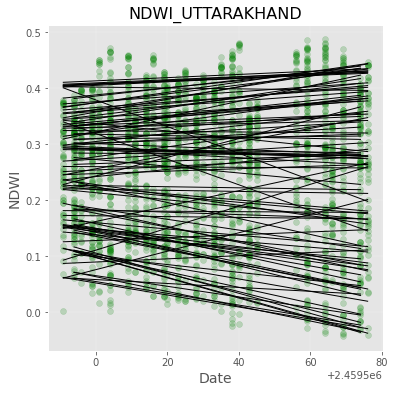

In [ ]:
# Now that we have our data in a good shape, we can make plots

# get a stratified split dataset by column lat_lon
df_grouped = df.groupby(df.lon_lat)

print("Number of pixels: ", df_grouped.ngroups)

# select maximum number of pixels to plot
npixels = 100
if npixels > df_grouped.ngroups:
  npixels = df_grouped.ngroups

# define the model fitting function with parameters
def fit_model(t, a, b):
    return a + b * t

# Set starting parameters for curve fitting
a = 0.
b = 0.1

# Subplots.
fig, ax = plt.subplots(1, figsize=(6, 6))

print("Making a plot with the following pixel locations:")
pixels_for_plot = pd.unique(df['lon_lat'])[0:npixels]
print(pixels_for_plot)

# iterate over each pixel based on its lon_lat location index
for p in pixels_for_plot:

  # get group of NDVI values in the time series for pixel with index p
  this_pixel_series = df_grouped.get_group(p)

  # extract the Julian dates available for that pixel from the dataframe into an array
  x = np.array(this_pixel_series['JD']).astype(float)

  # extract the NDWI values from the dataframe as well
  y = np.array(this_pixel_series['ndwi']).astype(float)

  # Add scatter plots
  #ax.scatter(this_pixel_series['JD'], this_pixel_series['ndvi'],
  #          c='green', alpha=0.2, label='NDWI')
  ax.scatter(x, y, c='green', alpha=0.2, label='NDWI')

  # check that we have enough values in the time series for that pixel
  if len(x) < 5:
    print("pixel " + p + " has only " + str(len(x)) + " time points. Omitted from analysis.")
  else:
    # fit the model to the NDVI time series
    params_u, params_covariance_u = optimize.curve_fit(fit_model, x, y, p0=[a,b])

    # Add fitted curves
    ax.plot(this_pixel_series['JD'],
            fit_model(x, params_u[0], params_u[1]),
            label='fitted model', color='black', lw=1)

# Add some parameters.
ax.set_title('NDWI_UTTARAKHAND', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('NDWI', fontsize=14)
ax.grid(lw=0.2)
#ax.legend(fontsize=14, loc='lower right')

fig.show()

#Explore the data directory structure of our downloaded files

# Obtain download links for image composites from an image collection on Google Earth Engine

In [ ]:
# All products available are detailed on this page https://developers.google.com/earth-engine/datasets/.

# Name of the Sentinel 2 image collection
s2collection = ('COPERNICUS/S2')

# get the median composite of Sentinel-2 images in the time range
s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)

# to save disk space, we may want to download only certain bands
# band names for download, a list of strings
# only download R,G,B and NIR bands
bands = ['B2', 'B3', 'B4', 'B8']
print(bands)

# spatial resolution of the downloaded data
resolution = 20 # in units of metres

# Download images in Geotiff, using the get_url(name, image, scale, region) method
# ‘region’ is obtained from the area, but the format has to be adjusted using get_region(geom) method
search_region = pygge.get_region(search_area)
s2url = pygge.get_url('s2', s2median.select(bands), resolution, search_region, filePerBand=False)
print(s2url)

['B2', 'B3', 'B4', 'B8']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/9c7d835186f9780f4aa2ba29dfc9adc1-8e9b3335bf3465fdb90f2e75516ff693:getPixels


#Download the data

In [ ]:
# change directory to download directory
os.chdir(downloaddir)

# request information on the file to be downloaded
f = pygge.requests.get(s2url, stream =True)

# check whether it is a zip file
check = zipfile.is_zipfile(io.BytesIO(f.content))

# either download the file as is, or unzip it
while not check:
    f = requests.get(s2url, stream =True)
    check = zipfile.is_zipfile(io.BytesIO(f.content))
else:
    z = zipfile.ZipFile(io.BytesIO(f.content))
    z.extractall()

#Explore the data directory structure of our downloaded files

In [ ]:
# where we stored the downloaded Sentinel-2 images
os.chdir(downloaddir)
print("contents of ", downloaddir, ":")
!ls -l

contents of  /content/work/download :
total 1704
-rw-r--r-- 1 root root 1743872 Apr  4 07:39 s2.tif


#Show the image as a true colour composite

In [ ]:
# get list of all tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
print(allfiles)

# select the file for visualisation
thisfile = allfiles[0]
print(thisfile)

['s2.tif']
s2.tif


#Set the directory paths on Google Drive.

In [ ]:
# Load the Drive helper and mount your Google Drive as a drive in the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import required libraries, including the sentinelsat library this time
!pip install rasterio
!pip install sentinelsat
!pip install geopandas
!pip install rasterstats

import geopandas as gpd
import rasterio
from rasterio import plot
from rasterio.plot import show_hist
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt, geojson
from collections import OrderedDict
import json
import math
from osgeo import ogr
import os
from os import listdir
from os.path import isfile, isdir, join
from pyproj import Proj
from pprint import pprint
import shutil
import sys
import tenacity
import zipfile
from math import floor, ceil

# make sure that this path points to the location of the pygge module on your Google Drive
libdir = '/content/drive/MyDrive/219044739_GY7709_CW_1' # this is where pygge.py needs to be saved
if libdir not in sys.path:
    sys.path.append(libdir)

# import the pygge module
import pygge

%matplotlib inline

In [ ]:
# BEFORE YOU RUN THIS BLOCK, YOU NEED A USER ACCOUNT ON THE ESA SENTINEL HUB
# In a browser, go to https://scihub.copernicus.eu/dhus/#/home
# Click on the user symbol in the top right and then on 'sign up'
# Follow the instructions.
# When you have your account, create a .txt file in Word that contains two lines:
#   line 1 - your username
#   line 2 - your password
# save it under the name "sencredentials.txt"
# upload it to the same directory as the Jupyter Notebook on your Google Drive.

# path to your Google Drive
# EDIT THIS LINE (/content/drive/My Drive is the top directory on Google Drive):
wd = "/content/drive/MyDrive/219044739_GY7709_CW_1"
print("Connected to data directory: " + wd)
print("\nList of contents of " + wd)
for f in sorted(os.listdir(wd)):
  print(f)

# path to your temporary drive on the Colab Virtual Machine
cd = "/content/work"
print("Temporary work directory: ", cd)

# This file will allow the notebook to connect to your account on the ESA Data Archive.
credentials = join(wd, 'sencredentials.txt')  # contains two lines of text with username and password

# directory for downloading the Sentinel-2 granules
downloaddir = join(cd, 'download') # where we save the downloaded images
quickdir = join(cd, 'quicklooks')  # where we save the quicklooks
outdir = join(cd, 'out')           # where we save any other outputs

# CAREFUL: This code removes the named directories and everything inside them to free up space
# Note: shutil provides a lot of useful functions for file and directory management
try:
  shutil.rmtree(downloaddir)
except:
  print(downloaddir + " not found.")

try:
  shutil.rmtree(quickdir)
except:
  print(quickdir + " not found.")

try:
  shutil.rmtree(outdir)
except:
  print(outdir + " not found.")

# create the new directories, unless they already exist
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddir, exist_ok=True)
os.makedirs(quickdir, exist_ok=True)
os.makedirs(outdir, exist_ok=True)

# check whether the file with the login details exists
if "sencredentials.txt" not in os.listdir(wd):
  print("\nERROR: File sencredentials.txt not found. Cannot log in to Data Hub.\n")

Connected to data directory: /content/drive/MyDrive/219044739_GY7709_CW_1

List of contents of /content/drive/MyDrive/219044739_GY7709_CW_1
219044739_GY7709_CW1.ipynb
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.zip
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.zip
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.zip
__pycache__
pygge.py
s2.tif
s2_month001.tif
s2_month002.tif
s2_month003.tif
s2_month004.tif
s2_month005.tif
s2_month006.tif
sencredentials.txt
uttarakhand_drought_movie.gif
uttarakhand_ndwi_movie.gif
uttarakhand_shapefile
Temporary work directory:  /content/work


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Download the sentinel-2 images by the shapefile and timeline

In [ ]:
# EDIT THE SEARCH AND DOWNLOAD OPTIONS BELOW
ndown = 3 # number of scenes to be downloaded (in order of least cloud cover)
shapefile = join(wd, 'uttarakhand_shapefile', 'POLYGON.shp') # ESRI Shapefile of the study area

# Define a date range for our search
# WARNING: You need to check whether your images are available for download or
#          have been moved to the Long-Term Archive: 
#          https://scihub.copernicus.eu/userguide/LongTermArchive
datefrom = '20210701' # start date for imagery search
dateto   = '20211231' # end date for imagery search

# Define which cloud cover we accept in the images
clouds = '[0 TO 10]' # range of acceptable cloud cover % for imagery search

#Before executing the below code, the text file named "sencredentials.txt" should be created. The first line of the file is the username and second line of the file is the password. Then, save the file in the Google Drive

In [ ]:
# go to working directory
os.chdir(wd)

# load user credentials for Sentinel Data Hub at ESA, i.e. read two lines of text with username and password
with open(join(wd,credentials)) as f:
    lines = f.readlines()
username = lines[0].strip()
password = lines[1].strip()
f.close()

# do the search
api, products = pygge.search_Cop_Hub(api='https://apihub.copernicus.eu/apihub/', #'https://scihub.copernicus.eu/dhus', 
                                     username=username, password=password,
                                     shapefile=shapefile, datefrom=datefrom, 
                                     dateto=dateto, platformname='Sentinel-2', 
                                     processinglevel='Level-2A', clouds=clouds)

# convert the ordered dictionary to a dataframe
products_df = api.to_dataframe(products)
if len(products_df) == 0:
  print("No Sentinel-2 images found that match the search criteria.")
else:
  print(products_df.head())

                                                                                  title  \
145eb1db-a0f7-43cb-930d-456ad3caf347  S2B_MSIL2A_20211227T052229_N0301_R062_T44RKU_2...   
60526410-8f66-46a1-9e92-d322c7d9428e  S2A_MSIL2A_20211225T053241_N0301_R105_T44RKU_2...   
9bb5a273-3f1a-4060-a0cd-2adbc870a7ea  S2B_MSIL2A_20211220T053229_N0301_R105_T44RKU_2...   
b3b402f2-88cc-43bd-922f-4fdb49805264  S2B_MSIL2A_20211217T052219_N0301_R062_T44RKU_2...   
3dc99e5c-98f4-4773-83d6-f10bb22a6bb6  S2A_MSIL2A_20211215T053231_N0301_R105_T44RKU_2...   

                                                                                   link  \
145eb1db-a0f7-43cb-930d-456ad3caf347  https://apihub.copernicus.eu/apihub/odata/v1/P...   
60526410-8f66-46a1-9e92-d322c7d9428e  https://apihub.copernicus.eu/apihub/odata/v1/P...   
9bb5a273-3f1a-4060-a0cd-2adbc870a7ea  https://apihub.copernicus.eu/apihub/odata/v1/P...   
b3b402f2-88cc-43bd-922f-4fdb49805264  https://apihub.copernicus.eu/apihub/odata/v1/P...  

In [ ]:
print('Search resulted in '+str(products_df.shape[0])+' satellite images with '+
      str(products_df.shape[1])+' attributes.')

os.chdir(outdir) # set working direcory for output files

# sort the search results
products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
print("Sorted search results:")
print(products_df_sorted)

# save the full search results to a .csv file that you can read into Excel
outfile = 'searchresults_full.csv'
products_df_sorted.to_csv(outfile)
print("Search results saved: " + outfile)

# limit the download to the first 'ndown' images 
#   sorted by lowest cloud cover and earliest acquisition date
products_df_n = products_df_sorted.head(ndown)
print("Download list of selected images:")
print(products_df_n)

# save the list of data to be downloaded to a .csv file that you can read into Excel
outfile = 'searchresults4download.csv'
products_df_n.to_csv(outfile)
print("Download list saved: " + outfile)

Search resulted in 29 satellite images with 42 attributes.
Sorted search results:
                                                                                  title  \
5b8c9318-e45f-4786-afae-57ffa3cd42af  S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_2...   
8cd69fd1-65d8-4f16-9e0f-0b5b9bfaeaa6  S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_2...   
29df5e62-67e0-47fe-b794-1040085d0ceb  S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_2...   
f8447f5c-18d2-4b6d-a58e-a0d5393a8683  S2B_MSIL2A_20211028T051929_N0301_R062_T44RKU_2...   
8c86c825-08d5-4422-b51a-bb963ec7551e  S2A_MSIL2A_20211013T051751_N0301_R062_T44RKU_2...   
364f1497-15f5-4f49-8e2b-fcda89d8460b  S2B_MSIL2A_20211011T052739_N0301_R105_T44RKU_2...   
9bb5a273-3f1a-4060-a0cd-2adbc870a7ea  S2B_MSIL2A_20211220T053229_N0301_R105_T44RKU_2...   
b6e86350-e705-4784-ac8e-cd29f63bd1c7  S2B_MSIL2A_20211110T053039_N0301_R105_T44RKU_2...   
b3b402f2-88cc-43bd-922f-4fdb49805264  S2B_MSIL2A_20211217T052219_N0301_R062_T44RKU_2...   
f4557964

#The below code helps to download the Sentinel-2 images and save in the Google Drive

In [ ]:
# Download all selected images into a data directory
os.chdir("/content/drive/MyDrive/219044739_GY7709_CW_1") # set working direcory to download directory

# print the unique image IDs and download the images from the API
for i in products_df_n['uuid']:
  # check which images are in the Long-Term Archive
  is_online = api.is_online(i)
  if is_online:
    print('Product ',i , ' is online. Starting download.')
    api.download(i)
  else:
    print('Product ',i , ' is not online and will need to be retrieved from the Long-Term Archive. This may take a while.')
    # code adapted from https://sentinelsat.readthedocs.io/en/latest/api_overview.html
    # The @ key is called a 'decorator' in Python. It extends a function. In our case,
    # the decorator extends the download_all() function with the tenacity function.
    # Tenacity tries 5 times to download the image(s) and waits for 3600 seconds between
    # each attempt. In the meantime, hopefully the image has been retrieved from
    # the long-term archive.
    @tenacity.retry(stop=tenacity.stop_after_attempt(5), wait=tenacity.wait_fixed(3600))
    def download_all(*args, **kwargs):
      return api.download_all(*args, **kwargs)
    downloaded, triggered, failed = download_all([i])

Product  5b8c9318-e45f-4786-afae-57ffa3cd42af  is online. Starting download.


MD5 checksumming:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Product  8cd69fd1-65d8-4f16-9e0f-0b5b9bfaeaa6  is online. Starting download.


MD5 checksumming:   0%|          | 0.00/1.15G [00:00<?, ?B/s]

Product  29df5e62-67e0-47fe-b794-1040085d0ceb  is online. Starting download.


MD5 checksumming:   0%|          | 0.00/855M [00:00<?, ?B/s]

#NDWI CALCULATION

# The python code below is the modified source from the "Satellite Data Science" module 
************************************************************************************************************************************************************************************************************************************************
*Title  : practical_sync_week6_Sentinel2_NDVI_timeseries.ipynb 

*Author : Dr.Heiko Balzter and Dr.Espirito santo Fernando

*Date   : 2022

*Availability : Blackboard (University of Leicester)

************************************************************************************************************************************************************************************************************************************************

#Connecting to the Working Directory

In [ ]:
# path to your Google Drive
wd = "/content/drive/MyDrive/219044739_GY7709_CW_1" 
print("Connected to data directory: " + wd)

# path to the directory where we saved the downloaded Sentinel-2 images last time
datadir = '/content/drive/MyDrive/219044739_GY7709_CW_1'
print("Looking for image data in: " + datadir)

# path to your temporary drive on the Colab Virtual Machine
cd = "/content/work"

# Name of the shape file
shapefile = join(wd, 'uttarakhand_shapefile', 'POLYGON.shp') # ESRI Shapefile of the study area

# directory for downloading the Sentinel-2 granules
downloaddir = join(cd, 'download') # where we save the downloaded images
quickdir = join(cd, 'quicklooks')  # where we save the quicklooks
outdir = join(cd, 'out')           # where we save any other outputs

# CAREFUL: This code removes the named directories and everything inside them to free up space
try:
  shutil.rmtree(downloaddir)
except:
  print(downloaddir + " not found.")

try:
  shutil.rmtree(quickdir)
except:
  print(quickdir + " not found.")

try:
  shutil.rmtree(outdir)
except:
  print(outdir + " not found.")

# create the new directories, unless they already exist
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddir, exist_ok=True)
os.makedirs(quickdir, exist_ok=True)
os.makedirs(outdir, exist_ok=True)

print("Connected to Colab temporary data directory: " + cd)

print("\nList of contents of " + wd)
for f in sorted(os.listdir(wd)):
  print(f)

Connected to data directory: /content/drive/MyDrive/219044739_GY7709_CW_1
Looking for image data in: /content/drive/MyDrive/219044739_GY7709_CW_1
Connected to Colab temporary data directory: /content/work

List of contents of /content/drive/MyDrive/219044739_GY7709_CW_1
219044739_GY7709_CW1.ipynb
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924
S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.zip
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149
S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.zip
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106
S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.zip
__pycache__
pygge.py
s2.tif
s2_month001.tif
s2_month002.tif
s2_month003.tif
s2_month004.tif
s2_month005.tif
s2_month006.tif
sencredentials.txt
uttarakhand_drought_movie.gif
uttarakhand_ndwi_movie.gif
uttarakhand_shapefile


#Connecting to the Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Getting the shapefile extent, CRS and EPSG cODE

In [ ]:
# Get the shapefile layer's extent, CRS and EPSG code
extent, SpatialRef, epsg = pygge.get_shp_extent(shapefile)
print("Extent of the area of interest (shapefile):\n", extent)
print("\nSpatial referencing information (CRS) of the shapefile:\n", SpatialRef)
print("EPSG code: ", epsg)

Extent of the area of interest (shapefile):
 (78.34762573242188, 78.44238281249999, 30.440386086566367, 30.507850271871686)

Spatial referencing information (CRS) of the shapefile:
 GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295],
    AUTHORITY["EPSG","4326"]]
EPSG code:  4326


# Rooting to the data directory where downloaded sentinel-2 images located

In [ ]:
# where we stored the downloaded files
os.chdir(datadir)
print("contents of ", datadir, ":")
!ls -l


contents of  /content/drive/MyDrive/219044739_GY7709_CW_1 :
total 3121421
-rw------- 1 root root    3947468 Apr  4 08:15 219044739_GY7709_CW1.ipynb
drwx------ 2 root root       4096 Apr  4 08:15 __pycache__
-rw------- 1 root root      52123 Apr  4 07:11 pygge.py
drwx------ 3 root root       4096 Apr  3 01:44 S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924
-rw------- 1 root root 1154814645 Apr  3 00:59 S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.zip
drwx------ 3 root root       4096 Apr  3 01:39 S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149
-rw------- 1 root root 1147949947 Apr  3 00:57 S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.zip
drwx------ 3 root root       4096 Apr  3 01:15 S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106
-rw------- 1 root root  854868407 Apr  3 01:02 S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.zip
-rw------- 1 root root    4185463 Apr  2 23:31 s2_month001.tif
-rw------- 1 r

# To calculate the NDWI , BO3 and B08 bandfiles are taken from the Granule downloaded 

In [ ]:
# make a list of all Green and NIR image band file names
files_green= pygge.get_filenames(datadir, filepattern="B03", dirpattern="R10m")
files_nir = pygge.get_filenames(datadir, filepattern="B08", dirpattern="R10m")

# print the list of band files
# the output looks neater if we print each element of the list of strings in a new line
print("List of all Granule IDs:")
s2ids = [] # make an empty list to get all Sentinel 2 IDs
for i in files_green:
  s2id = i.split("/")[-1].split("_B03")[0]
  print(s2id)
  s2ids.append(s2id) # remember the id

print("List of all Green band image files:")
for i in files_green:
  print(i)

print("List of all NIR band image files:")
for i in files_nir:
  print(i)


List of all Granule IDs:
T44RKU_20211016T052821
T44RKU_20211105T053021
T44RKU_20211107T052019
List of all Green band image files:
/content/drive/MyDrive/219044739_GY7709_CW_1/S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924/S2A_MSIL2A_20211016T052821_N0301_R105_T44RKU_20211016T084924.SAFE/GRANULE/L2A_T44RKU_A032992_20211016T053827/IMG_DATA/R10m/T44RKU_20211016T052821_B03_10m.jp2
/content/drive/MyDrive/219044739_GY7709_CW_1/S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149/S2A_MSIL2A_20211105T053021_N0301_R105_T44RKU_20211111T153149.SAFE/GRANULE/L2A_T44RKU_A033278_20211105T053744/IMG_DATA/R10m/T44RKU_20211105T053021_B03_10m.jp2
/content/drive/MyDrive/219044739_GY7709_CW_1/S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106/S2B_MSIL2A_20211107T052019_N0301_R062_T44RKU_20211115T134106.SAFE/GRANULE/L2A_T44RKU_A024398_20211107T052551/IMG_DATA/R10m/T44RKU_20211107T052019_B03_10m.jp2
List of all NIR band image files:
/content/drive/MyDrive/219044739_GY7709_CW_1

Before we calculate the Normalised Difference Water Index from our images, we need to find the directories that contain the band files. They are located in the 10m subdirectories of our downloaded Sentinel-2 directories for each image as mentioned above.

#Calculate the NDWI from the warped Red and NIR bands

The Normalized Difference Water Index (NDWI) is known to be strongly related to the plant water content. It is therefore a very good proxy for plant water stress. The Normalized Difference Water Index (NDWI) (Gao, 1996) is a satellite-derived index from the Near-Infrared (NIR) and Short Wave Infrared (SWIR) channels.It is useful for drought monitoring.

The NDWI is used to monitor changes related to water content in water bodies. As water bodies strongly absorb light in visible to infrared electromagnetic spectrum, NDWI uses green and near infrared bands to highlight water bodies. It is sensitive to built-up land and can result in over-estimation of water bodies. The index was proposed by McFeeters, 1996.

Sentinel-2 NDWI = (B03 - B08) / (B03 + B08)

Band 3
B03 (green)
Resolution = 10m/px
Central Wavelength = 560nm
Bandwidth = 35nm
Use: It gives excellent contrast between clear and turbid (muddy) water, and penetrates clear water fairly well. It helps in highlighting oil on water surfaces, and vegetation. It reflects green light stronger than any other visible color. Man-made features are still visible.
Band 8
B08 (NIR)
Resolution = 10m/px
Central Wavelength = 842nm
Bandwidth = 115nm
Use: The near infrared band is good for mapping shorelines and biomass content, as well as at detecting and analyzing vegetation.

Data source: https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/ndwi/

In [ ]:
# make an empty list to store the file names of our new NDVI files
ndwifiles = []

# iterate over all Sentinel-2 images and calculate NDVI
for x in range(len(files_green)):
  file_green = files_green[x]
  file_nir = files_nir[x]
  # create an output file name
  ndwifile = join(quickdir, s2ids[x] + "_ndwi.tif")
  # remember the file name we created
  ndwifiles.append(ndwifile)
  # calculate the NDWI raster

  #ndwi = (file_green - file_nir) / (file_green +# file_nir) 
  pygge.easy_ndvi(file_green, file_nir, ndwifile)

print("List of all NDWI image files:")
for i in ndwifiles:
  print(i)

/content/drive/MyDrive/219044739_GY7709_CW_1/pygge.py:768: RuntimeWarning: invalid value encountered in true_divide
  ndvi = np.divide((band_nir - band_red), (band_nir + band_red)) # ignore division by zero errors here


List of all NDWI image files:
/content/work/quicklooks/T44RKU_20211016T052821_ndwi.tif
/content/work/quicklooks/T44RKU_20211105T053021_ndwi.tif
/content/work/quicklooks/T44RKU_20211107T052019_ndwi.tif


#Warp the NDWI images to the same projection as the shapefile.


In [ ]:
print("Reprojecting all band images to the following projection:")
print(SpatialRef)
print("with EPSG code ", epsg)

warpfiles = [] # make an empty list of warped NDVI file names

# iterate over all NDVI files and warp the image
for x in range(len(ndwifiles)):
  ndwifile = ndwifiles[x]

  # make a directory path and file name for the warped output file
  warpfile = join(quickdir, s2ids[x] + "_ndwi_warped.tif")
  warpfiles.append(warpfile) # add it to our list

  # call the easy_warp function from pygge
  pygge.easy_warp(ndwifile, warpfile, epsg)

for f in warpfiles:
  print(f)

Reprojecting all band images to the following projection:
GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295],
    AUTHORITY["EPSG","4326"]]
with EPSG code  4326
Creating warped file:/content/work/quicklooks/T44RKU_20211016T052821_ndwi_warped.tif
Creating warped file:/content/work/quicklooks/T44RKU_20211105T053021_ndwi_warped.tif
Creating warped file:/content/work/quicklooks/T44RKU_20211107T052019_ndwi_warped.tif
/content/work/quicklooks/T44RKU_20211016T052821_ndwi_warped.tif
/content/work/quicklooks/T44RKU_20211105T053021_ndwi_warped.tif
/content/work/quicklooks/T44RKU_20211107T052019_ndwi_warped.tif


#Clip the NDWI files to the shapefile extent
For mapping application, it is often sufficient to map the area of interest and not the entire image.

/content/work/quicklooks/T44RKU_20211016T052821_ndwi_warped.tif
Clipped file:  /content/work/quicklooks/T44RKU_20211016T052821_ndwi_warped_clip.tif
Window coordinates:  Window(col_off=4917, row_off=2152, width=972, height=693)
Window array size:  (1, 693, 972)
/content/work/quicklooks/T44RKU_20211105T053021_ndwi_warped.tif
Clipped file:  /content/work/quicklooks/T44RKU_20211105T053021_ndwi_warped_clip.tif
Window coordinates:  Window(col_off=4917, row_off=2152, width=972, height=693)
Window array size:  (1, 693, 972)
/content/work/quicklooks/T44RKU_20211107T052019_ndwi_warped.tif
Clipped file:  /content/work/quicklooks/T44RKU_20211107T052019_ndwi_warped_clip.tif
Window coordinates:  Window(col_off=4917, row_off=2152, width=972, height=693)
Window array size:  (1, 693, 972)
total 2870320
-rw-r--r-- 1 root root 482307840 Apr  4 08:17 T44RKU_20211016T052821_ndwi.tif
-rw-r--r-- 1 root root   2696832 Apr  4 08:19 T44RKU_20211016T052821_ndwi_warped_clip.tif
-rw-r--r-- 1 root root 495773826 Ap

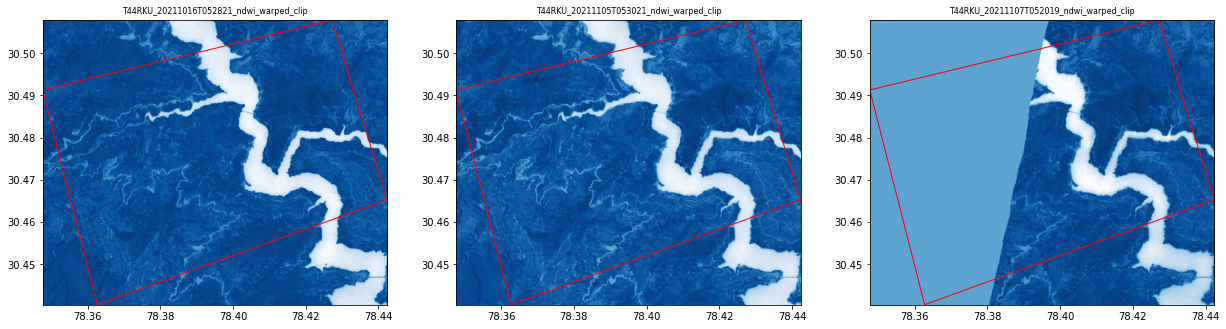

In [ ]:
# make an empty list where we will remember all clipped file names
clipfiles = [] 

nfiles = len(ndwifiles)

# arrange our subplots, assuming a 16:9 screen ratio
cols = min(nfiles, 4) # maximum of 4 plots in one row
rows = math.ceil(nfiles / cols) # round up to nearest integer

# create a figure with subplots
fig, ax = plt.subplots(rows, cols, figsize=(21,7))
fig.patch.set_facecolor('white')

# iterate over all warped raster files
for i, warpfile in enumerate(warpfiles):
  print(warpfile)

  # make the filename of the new zoom image file
  clipfile = warpfile.split(".")[0] + "_clip.tif"
  clipfiles.append(clipfile) # remember the zoom file name in our list
  print("Clipped file: ", clipfile)

  # clip it to the shapefile extent
  pygge.easy_clip(warpfile, clipfile, extent)

# make maps
if len(clipfiles) == 1:
  pygge.easy_plot(clipfile, ax, bands=[1], cmap="Blues", percentiles=[0,100],
                  shapefile=shapefile, linecolor="red", 
                  title = clipfile.split("/")[-1].split(".")[0], fontsize=8)
else:
  for i, clipfile in enumerate(clipfiles):
    pygge.easy_plot(clipfile, ax[i], bands=[1], cmap="Blues", percentiles=[0,100],
                  shapefile=shapefile, linecolor="red", 
                  title = clipfile.split("/")[-1].split(".")[0], fontsize=8)
    
os.chdir(quickdir)
!ls -l

#Extracting some statistics on NDWI from a small polygon
We will use the zonal statistics function from the Rasterstats library for this purpose, as it is easy to use.

https://pythonhosted.org/rasterstats/manual.html

It is implemented in the pygge library function easy_zonal_stats, which calles the rasterstats function for each raster file in a list of input files and saves the statistics outputs in one large table, with the scene ID of each satellite image as a column. We will save the files in .csv format, so they can be read into Excel.

In Python we can also save files with entire objects in their original form. The pickle library allows us to do that.

In [ ]:
import pickle
# make the name of the statistics output file
statsfile = outdir + "/" + "zonalstats.csv"

# call the pygge function for processing zonal statistics for multiple raster files
zonalstats = pygge.easy_zonal_stats(clipfiles, shapefile, statsfile, nodata=0)

print("\nSaved statistics file: " + statsfile)
# open the file
f = open(statsfile,"r") 
# read and print its contents (all lines)
pprint(f.read().splitlines())
# close the file
f.close()

# make the filename of the new pickle file for the stats object
pklfile = statsfile.split(".")[1] + ".pkl"

# write object to file
with open(pklfile, "wb") as f:
  pickle.dump(zonalstats, f)
print("\nPickled zonal statistics as pandas dataframe in file: " + pklfile + "\n")


Saved statistics file: /content/work/out/zonalstats.csv
['min,max,mean,count,median,scene_id',
 '-1.0,0.8718425035476685,0.506032479368357,424227.0,0.6632227301597595,T44RKU_20211016T052821_ndwi_warped_clip',
 '-0.6498533487319946,0.8261952996253967,0.5163934565103117,424227.0,0.630620539188385,T44RKU_20211105T053021_ndwi_warped_clip',
 '-0.9905811548233032,0.8327317237854004,0.40101796786744665,238123.0,0.6244648098945618,T44RKU_20211107T052019_ndwi_warped_clip']

Pickled zonal statistics as pandas dataframe in file: csv.pkl



# Plotting the graph for the zonal statistics file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/219044739_GY7709_CW_1/zonalstats.csv')

fig = px.line(df, x = 'min', y = 'scene_id', title= 'Statistics of ndwi min value')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/219044739_GY7709_CW_1/zonalstats.csv')

fig = px.line(df, x = 'max', y = 'scene_id', title= 'Statistics of ndwi max value')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/219044739_GY7709_CW_1/zonalstats.csv')

fig = px.line(df, x = 'mean', y = 'scene_id', title= 'Statistics of ndwi mean value')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/219044739_GY7709_CW_1/zonalstats.csv')

fig = px.line(df, x = 'count', y = 'scene_id', title= 'Statistics of ndwi count value')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/219044739_GY7709_CW_1/zonalstats.csv')

fig = px.line(df, x = 'median', y = 'scene_id', title= 'Statistics of ndwi median value')
fig.show()

#Make a movie from Timeseries of NDWI

# Taking only Bands B3 and B8

In [ ]:
# Obtain monthly image composites

# change directory to download directory
os.chdir(downloaddir)

# make a list of lists with all date ranges for our new searches
months = [
          ['2021-07-01', '2021-07-31'],
          ['2021-08-01', '2021-08-31'],
          ['2021-09-01', '2021-09-30'],
          ['2021-10-01', '2021-10-31'],
          ['2021-11-01', '2021-11-30'],
          ['2021-12-01', '2021-12-31']]

# set cloud cover threshold
clouds = 30

# band names for download, a list of strings
# only download R,G,B bands
bands = ['B8', 'B3']

# spatial resolution of the downloaded data
resolution = 20 # in units of metres

# iterate over the months
for month in range(len(months)):
  time_range = months[month]
  print(time_range)

  # do the search on Google Earth Engine
  s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)

  # print out the band names of the image composite that was returned by our search
  band_names = s2median.bandNames().getInfo()

  # check whether the search returned any imagery
  if len(band_names) == 0:
    print("Search returned no results.")

  else:
    # print all band names  
    print(band_names)

    # begin the file name with this ID
    file_id = 'each_month'
    
    s2url = pygge.get_url(file_id+str(month+1).zfill(3), s2median.select(bands), resolution, search_region, filePerBand=False)
    print(s2url)

    # request information on the file to be downloaded
    f = pygge.requests.get(s2url, stream =True)

    # check whether it is a zip file
    check = zipfile.is_zipfile(io.BytesIO(f.content))

    # either download the file as is, or unzip it
    while not check:
        f = pygge.requests.get(s2url, stream =True)
        check = zipfile.is_zipfile(io.BytesIO(f.content))
    else:
        z = zipfile.ZipFile(io.BytesIO(f.content))
        z.extractall()

# after downloading all image composites, get a list of all files we want to warp

allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
files_for_warp = [s for s in allfiles if file_id in s]

print("Files with file ID ", file_id, " for warping:")
pprint(sorted(files_for_warp))


['2021-07-01', '2021-07-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/182721c50a81ad585d84acfc7bac546b-61bf95499fef837dabbf885b75ec1098:getPixels
['2021-08-01', '2021-08-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/2398ae0e22d87ca9f34f47dade3fc2e2-e577c17c1f98a845841c762047a3be34:getPixels
['2021-09-01', '2021-09-30']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/d12c96cf749462f729f84863ff11a743-f23212476983784a1349154ff709baa5:getPixels
['2021-10-01', '2021-10-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10'

Warping raster file each_month001.tif
each_month001_warped.tif already exists. Skipping this command.
Converting raster file each_month001_warped.tif to 8-bit unsigned integer data type.
Warping raster file each_month001_warped.tif
Creating warped file:each_month001_warped_warped.tif
Converting raster file each_month001_warped_warped.tif to 8-bit unsigned integer data type.
Warping raster file each_month001_warped_uint8.tif
Creating warped file:each_month001_warped_uint8_warped.tif
Converting raster file each_month001_warped_uint8_warped.tif to 8-bit unsigned integer data type.
Warping raster file each_month002.tif
each_month002_warped.tif already exists. Skipping this command.
Converting raster file each_month002_warped.tif to 8-bit unsigned integer data type.
Warping raster file each_month002_warped.tif
Creating warped file:each_month002_warped_warped.tif
Converting raster file each_month002_warped_warped.tif to 8-bit unsigned integer data type.
Warping raster file each_month002_warp

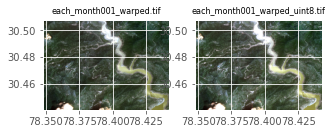

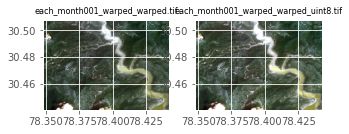

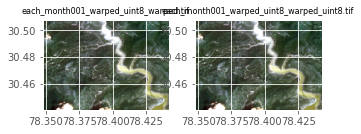

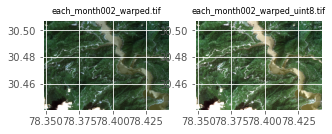

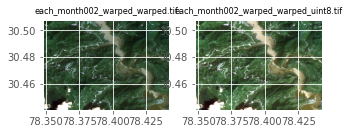

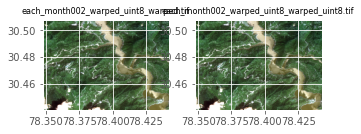

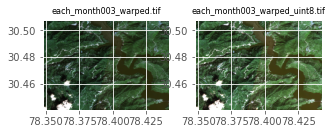

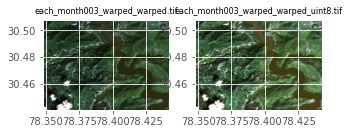

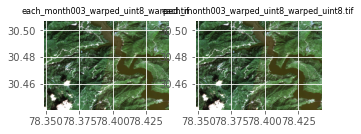

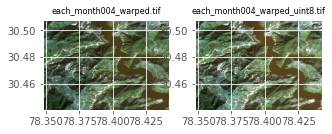

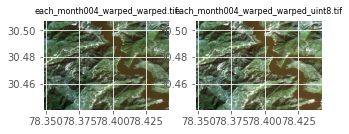

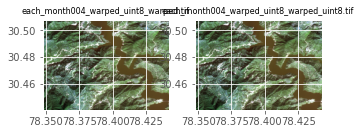

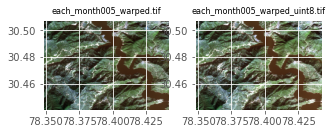

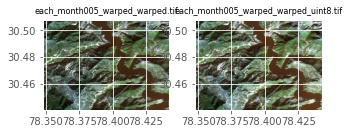

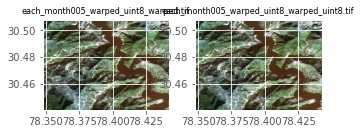

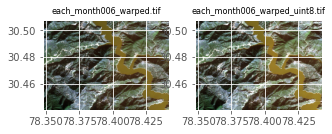

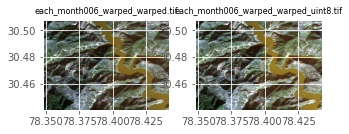

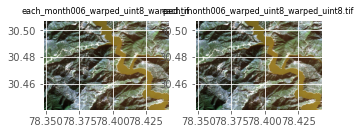

In [ ]:
# create and empty list for the newly created uint8 data file names
uint8files = []

# now warp them all
for f in sorted(files_for_warp):
  # make a file name for our new files
  warpfile = f.split('.')[0]+'_warped.tif'
  uint8file = f.split('.')[0]+'_warped_uint8.tif'
  # call the easy_warp function
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpfile, epsg)
  # convert to uint8 data type
  print("Converting raster file " + warpfile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(warpfile, uint8file, np.uint8, percentiles=[0,98])
  uint8files.append(uint8file)
  # create thumbnails for quality checking
  fig, ax = plt.subplots(1,2, figsize=(5,2.5))
  fig.patch.set_facecolor('white')
  pygge.easy_plot(warpfile, ax=ax[0], percentiles=[0,99], title=warpfile)
  pygge.easy_plot(uint8file, ax=ax[1], percentiles=[0,99], title=uint8file)
  
# after downloading and warping all image composites, get a list of all warped tiff files in the directory
allfiles = [f for f in listdir(downloaddir) if isfile(join(downloaddir, f))]
warpfiles = [s for s in allfiles if "_warped.tif" in s]

print("Files after warping:")
pprint(sorted(warpfiles))

print("Files after conversion to uint8 data type:")
pprint(sorted(uint8files))

In [ ]:
import imageio

# create an empty Numpy array where we will merge all raster images
images = []

# iterate over all zoom files
for f in sorted(uint8files):
  images.append(imageio.imread(f)) # read the next image and append it

# set the frame rate in seconds
framerate = { 'duration': 2 }

# save the movie
imageio.mimsave(join(downloaddir, "uttarakhand_ndwi_movie.gif"), images, **framerate)

#(Malik et al., 2021) Drought is a major natural calamity that has a negative impact on both human life and the environment.For evaluating meteorological drought conditions, a number of drought parameters to be analysed. The statistics data of the NDWI are calculated as min, max, mean, median and count value of the image file. The statistics of ndwi min value shows the moves to same point at -0.65 and statistics of ndwi max value shows maximum value of 0.87. The mean of the image file shows the decrease in each month of the image file.The median of the image file shows the decrease in value in a linear form. (Kumar et al., 2022)In water shortages areas, rainwater management is critical for long-term sustainability and increased crop output. For a dry year, an accurate rainwater gathering, water conservation, and water management strategy would be a good option. (Kumar et al., 2022) A rainy year with a lot of heavy rain during the monsoon months followed by a severely dry period emphasizes the need for water harvesting during the monsoon season and proper consumption during the subsequent dry times. In places affected by delayed monsoons, crop types with short growth periods and/or drought resilience should be developed. (Kumar et al., 2022)The area in which drought have severe affect in Uttarakhand Terai region are Pithoragarh of nearly 77% ,Tehri Garhwal of 74% ,Bageshwar of 72%,Chamoli of 71%,Champawat of 69%,Almora and Dehradun of 64%. The region of interest discussed in this analysis is on Tehri Garhwal which shows drought about 70%.


#References

1. https://timesofindia.indiatimes.com/city/dehradun/in-absence-of-rainfall-drought-like-situation-prevails-in-ukhands-terai-region/articleshow/84452150.cms.
2. https://en.gaonconnection.com/uttarakhand-the-himalayan-state-is-besieged-by-extreme-floods-and-increased-droughts/
3. Malik, A., Kumar, A., Kisi, O., Khan, N., Salih, S. and Yaseen, Z. (2021) 'Analysis of dry and wet climate characteristics at uttarakhand (india) using effective drought index', Natural Hazards, 105.
4. Kumar, R., Kumar, A., Shankhwar, A.K., Vishkarma, D.K., Sachan, A., Singh, P.V., Jahangeer, J., Verma, A. and Kumar, V. (2022) 'Modelling of meteorological drought in the foothills of central himalayas: A case study in uttarakhand state, india', Ain Shams Engineering Journal, 13(3), pp. 101595.

